# Importing Data

The first thing we do is importing our data and we do it by importing several libraries like Pandas,os,tarfile,urllib,numpyand mat plot lib, we also require several more further.

We are working on model in book Hands on Machine Learning with scikit-learn.
It has a Dataset from California regarding house price predictions.

In [64]:
import pandas as pd
import os
import tarfile
from six.moves import urllib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
        

In [4]:
fetch_housing_data()

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [6]:
housing = load_housing_data()


In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

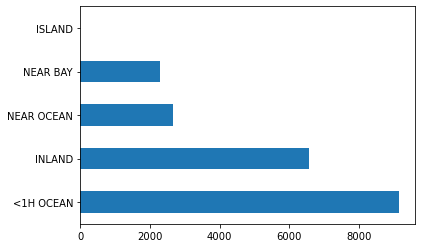

In [10]:
housing["ocean_proximity"].value_counts().plot(kind="barh")

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


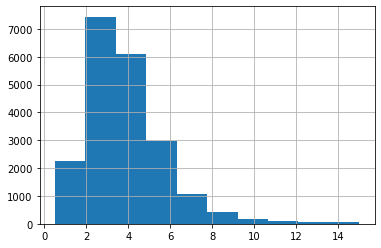

In [12]:
housing["median_income"].hist()

In [13]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins = [0.,1.5,3.0,4.5,6.,np.inf],
                              labels = [1,2,3,4,5])
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

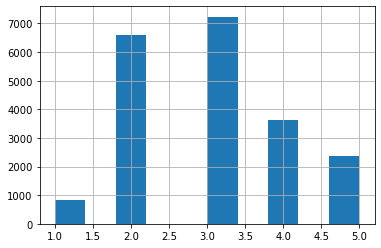

In [14]:
housing["income_cat"].hist()

In [15]:
y = housing["median_house_value"]
x = housing.drop("median_house_value",axis=1)
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


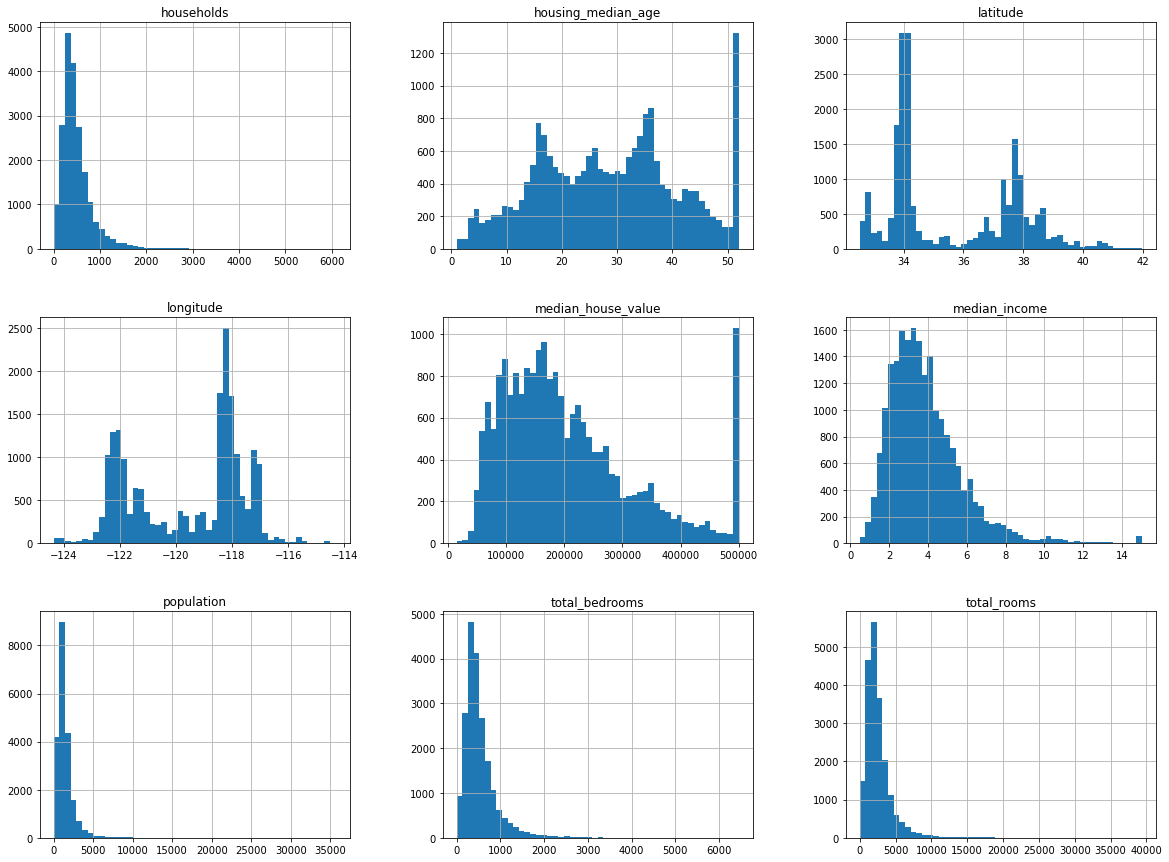

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

# split Dataset

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
946,-121.92,37.72,4.0,7477.0,1576.0,2937.0,1506.0,5.1437,<1H OCEAN,4
6922,-118.06,34.02,25.0,3548.0,639.0,2653.0,664.0,5.2557,<1H OCEAN,4
15213,-117.12,32.96,16.0,3050.0,559.0,1444.0,512.0,5.2463,<1H OCEAN,4
415,-122.27,37.89,52.0,2640.0,366.0,973.0,355.0,7.2660,NEAR BAY,5
14565,-117.20,32.84,32.0,2033.0,394.0,989.0,389.0,3.2583,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
14389,-117.23,32.74,16.0,1953.0,404.0,798.0,385.0,4.8167,NEAR OCEAN,4
17849,-121.87,37.42,25.0,4430.0,729.0,2685.0,721.0,5.6965,<1H OCEAN,4
14417,-117.24,32.79,25.0,2135.0,691.0,566.0,320.0,2.6902,NEAR OCEAN,2
14175,-117.05,32.75,35.0,2144.0,388.0,1003.0,383.0,3.0938,NEAR OCEAN,3


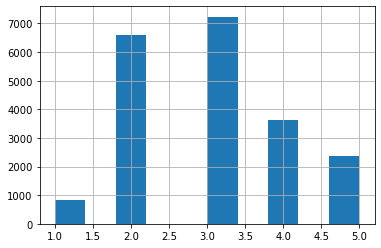

In [18]:
housing["income_cat"].hist()

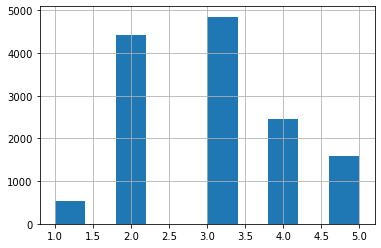

In [19]:
x_train["income_cat"].hist()

### stratified split

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [21]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [22]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [23]:
def income_cat_propogations(data):
    return data["income_cat"].value_counts()/len(data)

train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

compare_props = pd.DataFrame({
    "Overall":income_cat_propogations(housing),
    "Stratified": income_cat_propogations(strat_test_set),
    "Random":income_cat_propogations(strat_test_set)
}).sort_index()
compare_props["Rand.%error"] = 100 * compare_props["Random"]/compare_props["Overall"]-100
compare_props["Strat.%error"] = 100 * compare_props["Stratified"]/compare_props["Overall"]-100

compare_props


,Overall,Stratified,Random,Rand.%error,Strat.%error
1,0.039826,0.039729,0.039729,-0.243309,-0.243309
2,0.318847,0.318798,0.318798,-0.015195,-0.015195
3,0.350581,0.350533,0.350533,-0.013820,-0.013820
4,0.176308,0.176357,0.176357,0.027480,0.027480
5,0.114438,0.114583,0.114583,0.127011,0.127011


In [24]:
strat_train_set.drop("income_cat" , axis="columns" , inplace = True)
strat_test_set.drop("income_cat" , axis="columns" , inplace = True)

## Visualising Our Data

In [25]:
housing_copy = strat_train_set.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F85B87FC40>,
      dtype=object)

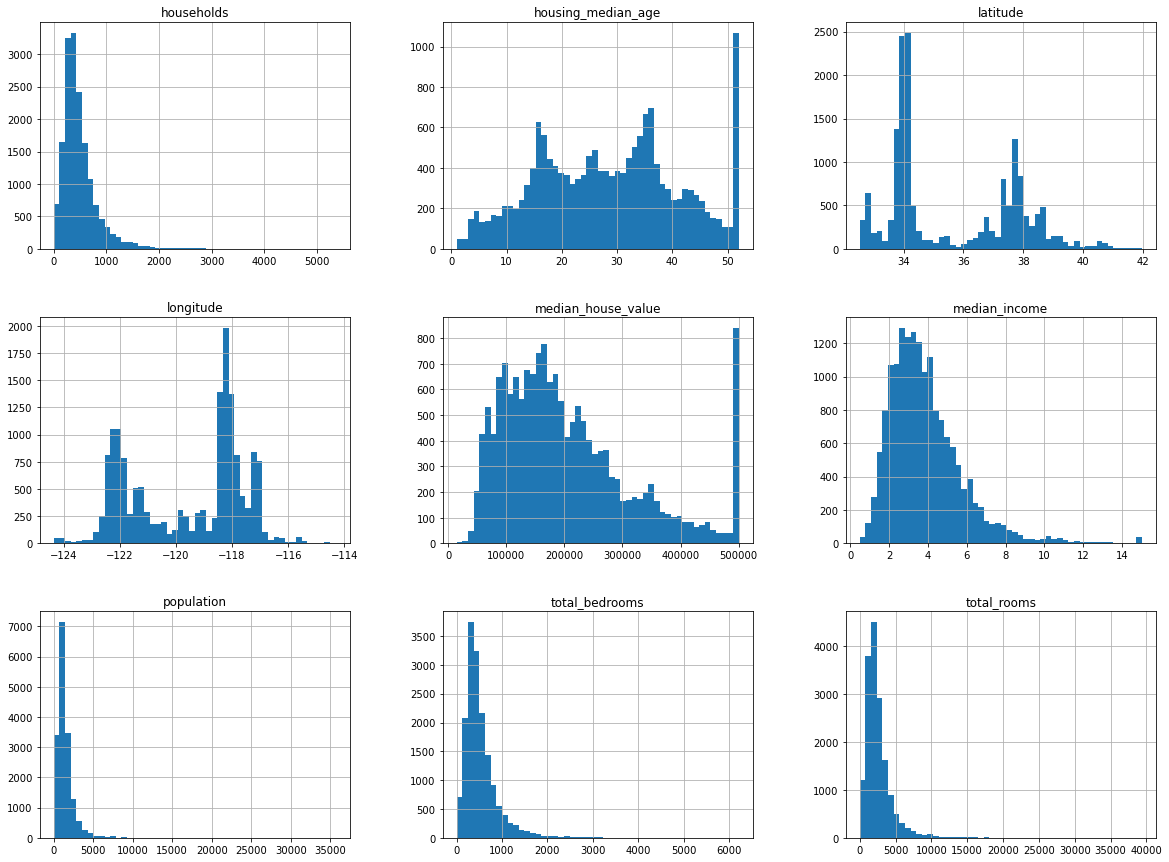

In [26]:
housing_copy.hist(bins = 50,figsize=(20,15))

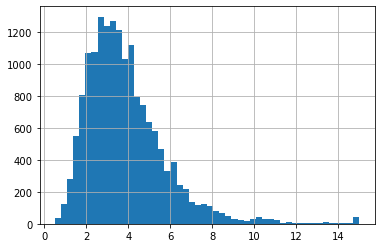

In [27]:
housing_copy["median_income"].hist(bins = 50)

### Geographic Data

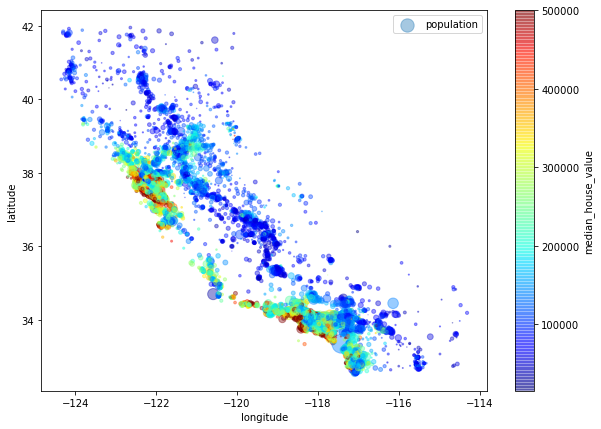

In [28]:
housing_copy.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
                 s=housing_copy["population"]/100,label="population",figsize=(10,7),
                 c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,
                 sharex=False)

## Correlation Matrices

In [29]:
housing_copy.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


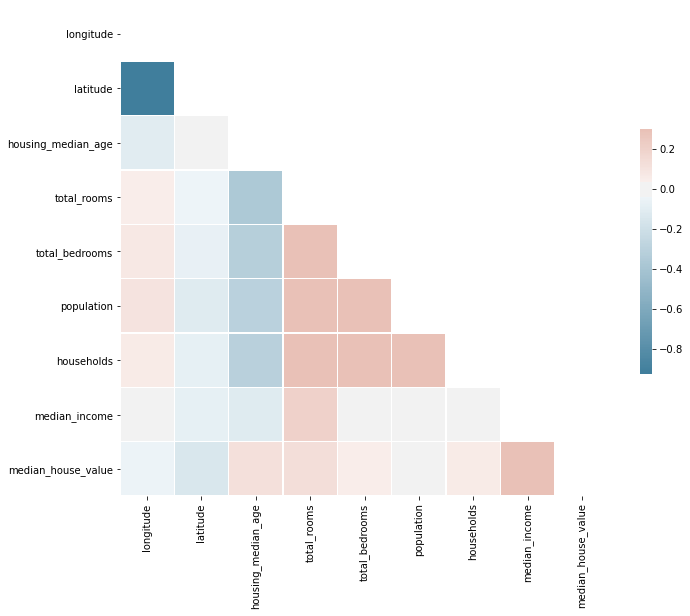

In [30]:
import seaborn as sns

corr = housing_copy.corr()

mask = np.triu(np.ones_like(corr, dtype = bool))

f,ax = plt.subplots(figsize = (11,9))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,
           square = True,linewidths=.5,cbar_kws={"shrink":.5})

## Preparing Data for Machine Learning

In [31]:
housing_copy2 = strat_train_set.drop("median_house_value",axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

### Dealing with Missing Values

In [32]:
sample_incomplete_rows = housing_copy2[housing_copy2.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [33]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [34]:
sample_incomplete_rows.drop("total_bedrooms",axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [35]:
median = housing_copy2["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median,inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

In [37]:
housing_num = housing_copy2.select_dtypes(include=[np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [38]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [39]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X,columns = housing_num.columns,index = housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [40]:
imputer.strategy

'median'

### Encode Categorical Variables

In [41]:
housing_cat = housing_copy[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [42]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [43]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### Feature Engineering

In [44]:
def feature_engineering(data):
    data["rooms_per_household"] = data["total_bedrooms"] / data["households"]
    data["population_per_household"] = data["population"] / data["households"]
    data["rooms_per_household"] = data["total_rooms"] / data["households"]
  
    return data

In [45]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,3.047847
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,6.052381,2.728571
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,4.635659,4.077519
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,6.346405,2.742484
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,5.505618,3.808989


### Scaling our Data

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.61493744,
        -0.31205452, -0.08649871],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  1.33645936,
         0.21768338, -0.03353391],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.5320456 ,
        -0.46531516, -0.09240499],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ..., -0.3167053 ,
         0.3469342 , -0.03055414],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.09812139,
         0.02499488,  0.06150916],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.15779865,
        -0.22852947, -0.09586294]])

In [47]:
housing_2=strat_train_set.drop("median_house_value",axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

def data_transformations(data):
    
    ### Separate Labels if they EXIST ###
    
    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value",axis=1)
        
    else:
        labels = None
        
    ### Feature Engineering ###
    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns) #Creating a list of our features for future use
    
    ### Imputing Data ###
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="median")
    
    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)
    
    ### Encoding Categorical Data ###
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])
    
    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse=False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity")#We're encoding this variable,so we don't need it in our list anymore
    
    ### Scaling numerical Data ###
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    
    housing_scaled = scaler.fit_transform(imputed)
    
    ###Concatening all Data ###
    output = np.hstack([housing_scaled,housing_cat_1hot])
    
    return output,labels,features

In [48]:
cat_encoder.categories_[0].tolist()

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

## Select and Train Model

In [49]:
train_data,train_labels,features = data_transformations(strat_train_set)
train_data

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [50]:
test_data,test_labels,features = data_transformations(strat_test_set)
test_data

array([[ 0.57471497, -0.69620912,  0.03285951, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83839441, -0.86074221,  0.82471029, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.24635944, -0.65390061, -0.12551065, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.52496413, -0.66800344,  0.19122966, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.10704893, -0.75732141, -0.12551065, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31601062,  0.55894333, -0.75899128, ...,  0.        ,
         0.        ,  0.        ]])

## Linear Regeression

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_data,train_labels)

LinearRegression()

In [52]:
original_values = test_labels[:5]

predicted_values = lin_reg.predict(test_data[:5])

comparison_dataframe = pd.DataFrame(data = {"Original Values":original_values,"Predicted Values":predicted_values})

comparison_dataframe["Differences"] = comparison_dataframe["Original Values"] - comparison_dataframe["Predicted Values"]

comparison_dataframe

,Original Values,Predicted Values,Differences
5241,500001.0,420455.768623,79545.231377
10970,240300.0,267801.714334,-27501.714334
20351,218200.0,228413.113641,-10213.113641
6568,182100.0,207479.622849,-25379.622849
13285,121300.0,169581.678782,-48281.678782


In [53]:
test_labels[:5]

5241     500001.0
10970    240300.0
20351    218200.0
6568     182100.0
13285    121300.0
Name: median_house_value, dtype: float64

In [54]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(original_values,predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

45085.12299701144

In [55]:
# Bring in the Metrics

from sklearn.metrics import mean_absolute_error

lin_mse = mean_absolute_error(original_values,predicted_values)
lin_mse

38184.27219647264

In [56]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(train_data,train_labels)

DecisionTreeRegressor(random_state=42)

In [57]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels,train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Cross Validation

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,train_data,train_labels,scoring = "neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [59]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())
    
display_scores(tree_rmse_scores)

Scores: [69608.72141399 69514.95832579 67440.00670475 71023.22770284
 71824.66133954 74357.72770421 72691.42915506 70615.78473818
 76044.37642103 68197.05871399]
Mean: 71131.79522193872
Standard Deviation: 2547.6767025189947


In [60]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100,random_state=42)
forest_reg.fit(train_data,train_labels)

RandomForestRegressor(random_state=42)

In [61]:
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels,train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18547.875935484157

In [62]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg,train_data,train_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49428.57758404 47240.05944234 49732.51356862 52274.14642477
 49193.2104798  53541.08320838 48624.03350642 47902.76213392
 53245.64279257 49857.75655498]
Mean: 50103.97856958466
Standard Deviation: 2076.4217152058145
